In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import pearsonr
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from pylab import rcParams
import matplotlib.ticker as mt
from matplotlib.ticker import ScalarFormatter

<a id='top'></a>
# World Food Programme: food price and affordability analysis
#### Data understanding and preparation
### [The World Bank: Annual consumer prices inflation ](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG) 

#### [Data understanding](#understanding)

#### [Data wrangling](#wrangling)

#### [Data cleaning](#cleaning)

#### [Distribution analysis](#distribution)

<a id='understanding'></a>
### Data understanding
[Back to top](#top)

In [2]:
path=r'C:\Users\frauz\Documents\Python Projects\Final Project\Data' #creating a path

In [3]:
df_inflation=pd.read_csv(os.path.join(path,'annual_consumer_price_inflation.csv'),index_col=False) #importing data

In [4]:
df_inflation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.245878,6.571396,6.399343,4.720811,4.653665,7.321106,6.824727,10.526577
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.768436,2.130817,1.487416,1.764635,1.784050,1.760112,2.437609,3.653533,7.967574
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266,NaN


In [7]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            70 non-null     float64
 5   1961            72 non-null     float64
 6   1962            74 non-null     float64
 7   1963            74 non-null     float64
 8   1964            79 non-null     float64
 9   1965            86 non-null     float64
 10  1966            93 non-null     float64
 11  1967            100 non-null    float64
 12  1968            101 non-null    float64
 13  1969            102 non-null    float64
 14  1970            107 non-null    float64
 15  1971            111 non-null    float64
 16  1972            114 non-null    float64
 17  1973            117 non-null    flo

In [9]:
df_inflation.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,70.000000,72.000000,74.000000,74.000000,79.000000,86.000000,93.000000,100.000000,101.000000,102.000000,...,237.000000,235.000000,234.000000,234.000000,229.000000,226.000000,225.000000,218.000000,216.000000,199.000000
mean,3.554980,3.491289,4.630783,5.846612,6.263870,8.192841,17.765764,5.469524,6.309715,4.446334,...,4.055602,3.622569,3.517770,5.900723,4.623951,4.012938,4.640539,6.820268,7.558895,10.891235
std,6.795697,4.508248,15.209955,17.152509,13.749261,33.376181,117.536433,14.150802,18.309690,4.140570,...,5.061676,5.588125,9.632061,30.074911,13.013837,7.510456,18.418945,39.691317,27.513739,13.880647
min,-5.030042,-3.900000,-3.846154,-2.694655,-4.535654,-3.878976,-1.361868,-8.422486,-10.033895,-4.339051,...,-4.294873,-1.509245,-3.749145,-3.078218,-1.537100,-2.814698,-3.233389,-2.595243,-0.772844,-6.687321
25%,0.871370,1.468978,1.147323,1.790965,1.870349,1.940405,2.479008,1.564937,1.588785,2.347005,...,1.458934,0.909467,0.296870,0.441596,1.429107,1.601762,1.108255,0.580369,2.333678,6.079347
50%,1.945749,2.102977,2.669962,2.898982,3.328408,3.410026,3.815659,3.020244,3.161937,3.388412,...,2.767897,2.559749,1.548692,1.652140,2.432488,2.527344,2.227479,2.049341,3.653533,8.304241
75%,4.037155,3.601606,4.614353,4.998460,4.822426,4.938170,6.951872,4.500319,4.697428,5.811237,...,5.353800,4.632431,4.038380,4.171390,4.447699,3.971012,3.322559,3.744932,5.152068,10.780581
max,39.590444,22.747264,131.397850,145.910781,108.994709,306.763110,1136.254112,106.000000,128.843042,21.763295,...,40.639428,62.168650,121.738085,379.999586,187.851630,83.501529,255.304991,557.201817,359.093041,138.808460


<a id='wrangling'></a>
### Data wrangling
[Back to top](#top)

In [10]:
# Dropping unnecessary columns

df_inflation=df_inflation.drop(columns=['Indicator Name','Indicator Code'])

In [11]:
df_inflation.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.245878,6.571396,6.399343,4.720811,4.653665,7.321106,6.824727,10.526577
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.768436,2.130817,1.487416,1.764635,1.784050,1.760112,2.437609,3.653533,7.967574
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266,NaN


In [13]:
# Unpivoting the data

df_inflation=pd.melt(df_inflation,id_vars=['Country Name','Country Code'], var_name='year', value_name='inflation')
df_inflation.head()

,Country Name,Country Code,year,inflation
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,NaN


In [18]:
# Renaming the columns

df_inflation.rename(columns={'Country Name':'country','Country Code':'iso'}, inplace=True)

In [19]:
df_inflation.head()

,country,iso,year,inflation
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,NaN


In [20]:
# Checking data types

df_inflation.dtypes

country       object
iso           object
year          object
inflation    float64
dtype: object

In [21]:
# Changing year to integer to enable future merging with other data sets

df_inflation=df_inflation.astype({'year':'int'})

In [22]:
df_inflation.dtypes

country       object
iso           object
year           int32
inflation    float64
dtype: object

In [25]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    16758 non-null  object 
 1   iso        16758 non-null  object 
 2   year       16758 non-null  int32  
 3   inflation  10773 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 458.4+ KB


In [54]:
df_inflation.describe()

,year,inflation
count,16758.000000,10773.000000
mean,1991.000000,20.035454
std,18.184785,291.483500
min,1960.000000,-17.640424
25%,1975.000000,2.378528
50%,1991.000000,4.905209
75%,2007.000000,9.722193
max,2022.000000,23773.131770


<a id='cleaning'></a>
### Data cleaning
[Back to top](#top)

In [24]:
# The data set covers a time period of more than 60 years. There are quite a high number of missing values for some of them 

df_inflation.isnull().sum()

country         0
iso             0
year            0
inflation    5985
dtype: int64

In [38]:
# Removing the time period 1960-1989 that won't be used in the further analysis
remove_years=list(range(1960,1990))
print(remove_years)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]


In [39]:
df_infl=df_inflation.drop(df_inflation[df_inflation['year'].isin(remove_years)].index) # removing the chosen years

In [40]:
df_infl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 7980 to 16757
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    8778 non-null   object 
 1   iso        8778 non-null   object 
 2   year       8778 non-null   int32  
 3   inflation  7158 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 240.2+ KB


In [41]:
df_infl.isnull().sum() # Remaining missing values will be addressed later when this dataset will be merged with others

country         0
iso             0
year            0
inflation    1620
dtype: int64

In [44]:
# Checking for duplicated value

df_infl.duplicated().value_counts() # no duplicates detected

False    8778
dtype: int64

<a id='understanding'></a>
### Data Distribution
[Back to top](#top)

<Axes: >

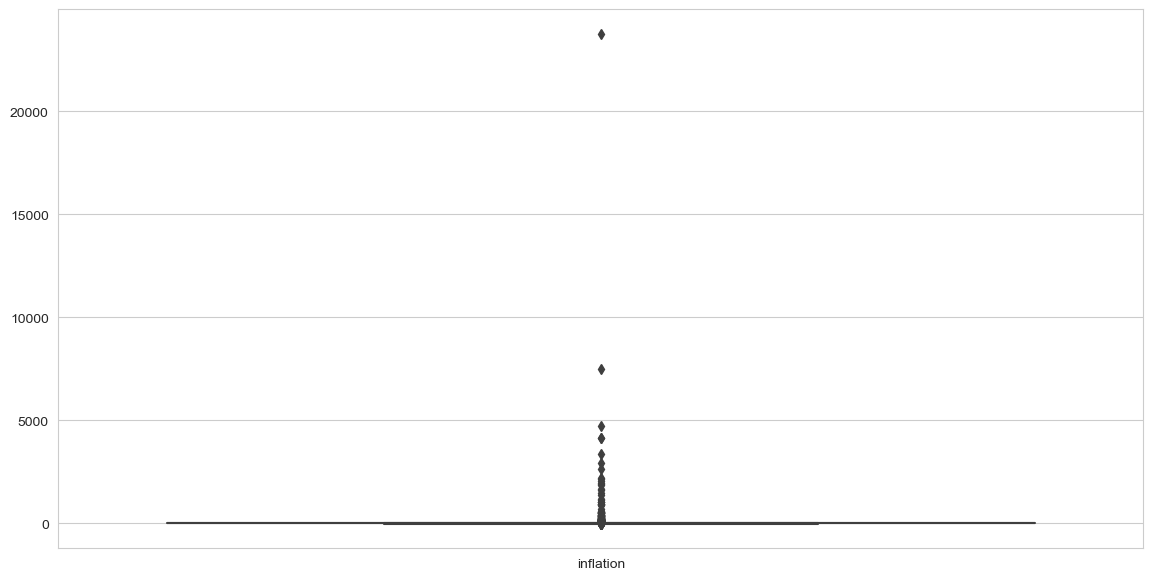

In [59]:
# Plotting  data distribution

%matplotlib inline
rcParams['figure.figsize']=14,7
sns.set_style('whitegrid')

sns.boxplot(data=df_infl[['inflation']])

In [56]:
# Verifying inflation values
df_infl.loc[df_infl['inflation'].idxmax()] # this value is correctly represents the hyperinflation in 1990s

country      Congo, Dem. Rep.
iso                       COD
year                     1994
inflation         23773.13177
Name: 9087, dtype: object

In [57]:
# Verifying the minimum population value

df_infl.loc[df_infl['inflation'].idxmin()] # the value doesn't seem incorrect

country        Lesotho
iso                LSO
year              2009
inflation   -16.859691
Name: 13175, dtype: object

In [58]:
# Exporting the data for further analysis

df_infl.to_pickle(os.path.join(path,'Data Prepared','inflation.pkl'))